In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

2026-02-22 16:39:51.268347: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-22 16:39:51.301230: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-22 16:39:52.061708: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
# Show the dataset
df = pd.read_csv('Diabetes Dataset/Doctor_Oriented_Dataset.csv')
df.head()

,Age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,52,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


In [3]:
# Set the independent and dependent features
X = df.drop(['diabetes_stage', 'diet_score', 'diagnosed_diabetes'], axis=1)
y = df['diabetes_stage']

# Separate 15% from the dataset for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Turn categorical labels to normalized numerical format
categorical_features = [
    'gender', 
    'ethnicity', 
    'education_level', 
    'income_level', 
    'employment_status', 
    'smoking_status'
]

numerical_features = [
    'Age',
    'alcohol_consumption_per_week',
    'sleep_hours_per_day',
    'screen_time_hours_per_day',
    'family_history_diabetes', 
    'hypertension_history',
    'cardiovascular_history',
    'bmi',
    'waist_to_hip_ratio',
    'systolic_bp',
    'diastolic_bp',
    'heart_rate',
    'cholesterol_total',
    'hdl_cholesterol',
    'ldl_cholesterol',
    'triglycerides',
    'glucose_fasting',
    'glucose_postprandial',
    'insulin_level',
    'hba1c',
    'diabetes_risk_score'
]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Scale the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# One Hot Encode y
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


# The Model 💅 SLAYYYY
model = Sequential([
    Dense(50, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=1)

/home/greymatcha/Development/University/intelligent-systems-2/2026_02-23_Reporting/Keras-Classification-Model-for-Diabetes/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1771749592.658632   46947 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3493 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Epoch 1/5


2026-02-22 16:39:53.485266: I external/local_xla/xla/service/service.cc:163] XLA service 0x78e3dc019210 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2026-02-22 16:39:53.485281: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2026-02-22 16:39:53.499864: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2026-02-22 16:39:53.545437: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91900


 220/2585 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step - accuracy: 0.4499 - loss: 1.2511

I0000 00:00:1771749594.329131   47018 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2585/2585 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7870 - loss: 0.5219 - val_accuracy: 0.8426 - val_loss: 0.4113
Epoch 2/5
2585/2585 ━━━━━━━━━━━━━━━━━━━━ 2s 859us/step - accuracy: 0.8561 - loss: 0.3764 - val_accuracy: 0.8621 - val_loss: 0.3703
Epoch 3/5
2585/2585 ━━━━━━━━━━━━━━━━━━━━ 2s 868us/step - accuracy: 0.8664 - loss: 0.3508 - val_accuracy: 0.8683 - val_loss: 0.3551
Epoch 4/5
2585/2585 ━━━━━━━━━━━━━━━━━━━━ 2s 817us/step - accuracy: 0.8724 - loss: 0.3374 - val_accuracy: 0.8708 - val_loss: 0.3438
Epoch 5/5
2585/2585 ━━━━━━━━━━━━━━━━━━━━ 2s 786us/step - accuracy: 0.8775 - loss: 0.3266 - val_accuracy: 0.8780 - val_loss: 0.3346


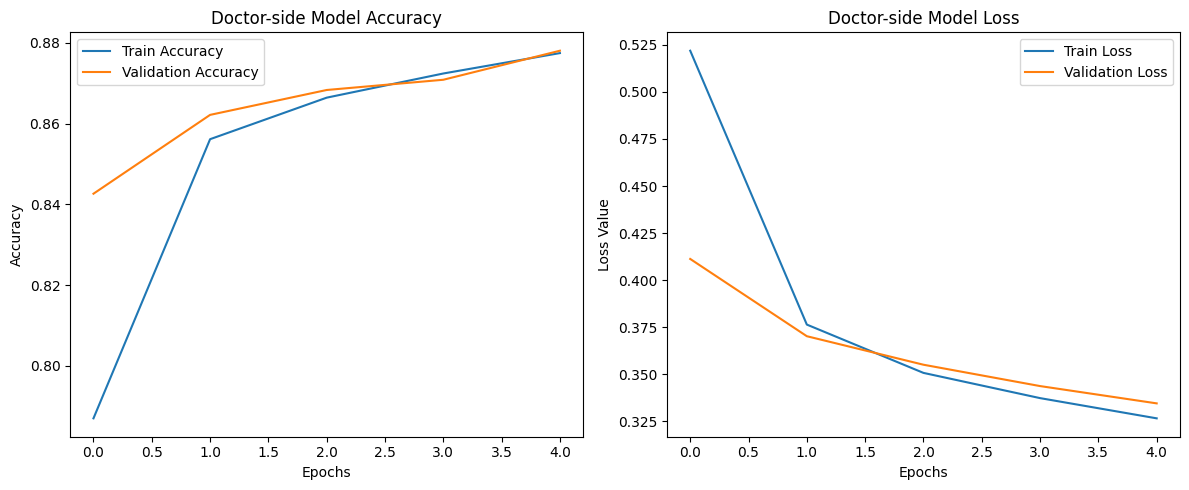

In [4]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Doctor-side Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Doctor-side Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
# Save the final model
# Task: Make a model saving utility that appends version at the end and saves the model
#   Requirements:
#       Format: ModelName_vMajor.Minor.Revisions.h5
#       Version must increment based on the latest version in the Models/
from pathlib import Path
from Utils.versionsys import save_model

model_name = "doctor_side_model"
save_path = Path("./Models")
save_model(model=model, model_name=model_name, save_path=save_path, version_increment_type="revision", file_type=".h5")

True